In [70]:
import numpy as np 
import matplotlib.pyplot as plt

In [71]:
# parameters and define the function here here 
beta = 0.9

def utility(x,d):
    if d == 0:
        return -2*x 
    if d == 1:
        return -6 #fixed restocking cost 

def next_state(x,d):
    if d == 0:
        return max(x-1,0)
    if d == 1:
        return 4 #max inventory

In [72]:
V = np.zeros(5) #initialize first guess all equals 0

def iteration(value):
    last_one = value.copy()
    for i in range(5):
        state = i
        v0 = np.exp(utility(state,0) + beta*last_one[next_state(state,0)])
        v1 = np.exp(utility(state,1) + beta*last_one[next_state(state,1)])
        value[i] = np.log(v0+v1)

distance = 1
distance_record = []
first, second, third, fourth, fifth = [],[],[],[],[]
while distance > 0.00001:
    first.append(V[0])
    second.append(V[1])
    third.append(V[2])
    fourth.append(V[3])
    fifth.append(V[4])
    last_one = V.copy()
    iteration(V)
    distance = sum(abs(last_one - V))
    distance_record.append(distance)

print(len(first), len(distance_record))

48 48


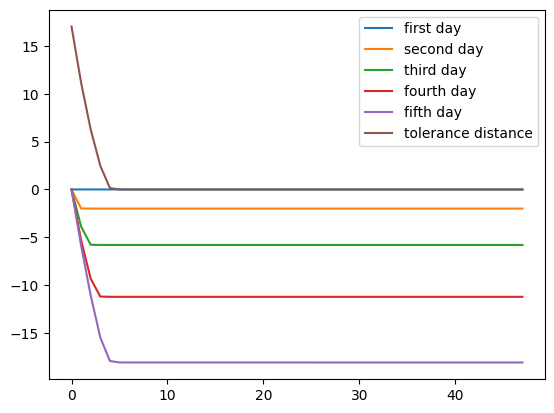

the converged value function: [ 1.76037204e-05 -1.99998239e+00 -5.79998233e+00 -1.12199665e+01
 -1.80827324e+01]


In [73]:
#graphing out the movement of the values to show that it converges 
x = np.arange(len(first))  # Time axis from 0 to 99

plt.plot(x,first, label='first day')
plt.plot(x,second, label='second day')
plt.plot(x,third, label='third day')
plt.plot(x,fourth, label='fourth day')
plt.plot(x,fifth, label='fifth day')

plt.plot(x,distance_record, label='tolerance distance')
plt.legend()
plt.show()

#this shows that the value function actually converges 
print("the converged value function:", V)

In [74]:
#now we will get to the likelihood function 
choice_value_0 = []
choice_value_1 = []

for i in range(5):
    choice_value_0.append(utility(i,0) + beta*V[next_state(i,0)])
    choice_value_1.append(utility(i,1) + beta*V[next_state(i,1)])

print(choice_value_1)
print(choice_value_0)


[np.float64(-22.27445920422057), np.float64(-22.27445920422057), np.float64(-22.27445920422057), np.float64(-22.27445920422057), np.float64(-22.27445920422057)]
[np.float64(1.5843348333761064e-05), np.float64(-1.9999841566516663), np.float64(-5.799984155432684), np.float64(-11.219984092726754), np.float64(-18.09796986483242)]


In [75]:
# compute the choice probability now 

choice_prob_0 = []
choice_prob_1 = []

for i in range(5):
    sum_utility = np.exp(choice_value_0[i])+np.exp(choice_value_1[i])
    choice_prob_0.append(np.exp(choice_value_0[i])/sum_utility)
    choice_prob_1.append(np.exp(choice_value_1[i])/sum_utility)

print(choice_prob_1)
print(choice_prob_0)


[np.float64(2.1199147638818943e-10), np.float64(1.5664169094058692e-09), np.float64(7.002068638220857e-08), np.float64(1.581596116411124e-05), np.float64(0.015120180130232383)]
[np.float64(0.9999999997880085), np.float64(0.9999999984335831), np.float64(0.9999999299793135), np.float64(0.9999841840388358), np.float64(0.9848798198697677)]


In [76]:
# try compare between replace-replace-replace and keep-keep-replace
# keep-keep-replace should reasonably be higher?
likelihood_rrrrr = sum([np.log(choice_prob_1[i]) for i in range(5)])
likelihood_kkkkr = sum([np.log(choice_prob_0[i]) for i in range(4)]) + np.log(choice_prob_1[4])

print(likelihood_rrrrr)
print(likelihood_kkkkr)
print("indeed it is true")

-74.26964113823139
-4.191740882811891
indeed it is true
